In [41]:
from langgraph.graph import StateGraph , START, END 
from typing import TypedDict,Literal
from pydantic import BaseModel, Field
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
load_dotenv()  # take environment variables from .env file

True

In [42]:
model= ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0)



In [43]:
class SentimentSchema(BaseModel):
    sentiment: Literal["positive","negative"] = Field(..., description="Sentiment of the review")
    

In [44]:

structured_model=model.with_structured_output(SentimentSchema)

In [45]:
prompt="what is sentiment of this review: 'The product was great and met all my expectations.' Answer with only positive or negative."

In [46]:
structured_model.invoke(prompt)

SentimentSchema(sentiment='positive')

In [47]:
class ReviewState(TypedDict):
    review: str
    sentiment: Literal["positive","negative"]
    diagnosis: dict
    response: str

In [ ]:
def find_sentiment(state: ReviewState):
    prompt=f"what is sentiment of this review: '{state['review']}' Answer with only positive or negative."
    result=structured_model.invoke(prompt)
    return {"sentiment":result.sentiment}

def check_sentiment(state: ReviewState) -> Literal["positive","run_diagosis"]:
    if state['sentiment']=="positive":
        return "positive"
    else:
        return "run_diagosis"

In [ ]:
graph= StateGraph(ReviewState)

graph.add_node("find_sentiment",find_sentiment)
graph.add_node("check_sentiment",check_sentiment)


graph.add_edge(START,"find_sentiment")
graph.add_edge("find_sentiment",END)

workflow= graph.compile()

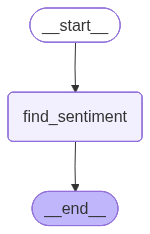

In [58]:
workflow

In [59]:
initial_state={
    "review":"The product was terrible and did not meet my expectations."
}

workflow.invoke(initial_state)

{'review': 'The product was terrible and did not meet my expectations.',
 'sentiment': 'negative'}